#**Mini-Project 2: Time Series Forecasting using NN, LSTM and CNN** 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Implementation: Fully Connected Neural Network**

######Import required helper functions

In [2]:
%cd "/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/"
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P2_TimeForecast/P2_CodeBase
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=d36a23d972ce021ae2d0af36e1207958a335fe1736149a3fcf677b4487d997b8
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from plotlib_helper.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
importing Jupyter notebook from datapreprocess_helper.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### Define path

In [3]:
path="/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/data"
dnn_path="/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/dnn"


### **Load data**

In [4]:
import pandas as pd
import os
import numpy as np 

filename_read = os.path.join(path,"P2_preprocessed_NN.csv")
df = pd.read_csv(filename_read,na_values=['NA','?','-'])

print("dataset:", df.shape)

dataset: (4384, 36)


### **Split dataset into train set and test set**

In [5]:
from sklearn.model_selection import train_test_split
x, y = dataprep.to_xy(df,'35')
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state =42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3068, 35)
(1316, 35)
(3068,)
(1316,)


### **Implement fully connected Neural Network**


In [6]:
layers=[50,10]
activation=["ReLu"]
optimizer=["adam"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

{'layers': [50, 10], 'activation': ['ReLu'], 'optimizer': ['adam']}


In [7]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()
    
    model.add(Dense(50,input_dim=x_train.shape[1], activation='relu'))   

    model.add(Dense(10,activation='relu'))

    model.add(Dense(1)) 
    
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    

model.load_weights(bestModelPath)


0
Epoch 1/1000
96/96 - 0s - loss: 1323.1697 - val_loss: 483.3655
Epoch 2/1000
96/96 - 0s - loss: 225.6702 - val_loss: 155.3984
Epoch 3/1000
96/96 - 0s - loss: 157.5903 - val_loss: 134.3623
Epoch 4/1000
96/96 - 0s - loss: 134.0980 - val_loss: 110.2486
Epoch 5/1000
96/96 - 0s - loss: 104.2200 - val_loss: 81.0437
Epoch 6/1000
96/96 - 0s - loss: 71.7950 - val_loss: 52.6294
Epoch 7/1000
96/96 - 0s - loss: 43.7264 - val_loss: 30.2081
Epoch 8/1000
96/96 - 0s - loss: 22.9799 - val_loss: 15.4233
Epoch 9/1000
96/96 - 0s - loss: 10.6348 - val_loss: 8.1263
Epoch 10/1000
96/96 - 0s - loss: 5.6332 - val_loss: 5.3921
Epoch 11/1000
96/96 - 0s - loss: 3.6660 - val_loss: 3.9091
Epoch 12/1000
96/96 - 0s - loss: 2.6584 - val_loss: 3.1563
Epoch 13/1000
96/96 - 0s - loss: 2.1756 - val_loss: 2.6115
Epoch 14/1000
96/96 - 0s - loss: 1.9159 - val_loss: 2.2925
Epoch 15/1000
96/96 - 0s - loss: 1.6508 - val_loss: 2.0622
Epoch 16/1000
96/96 - 0s - loss: 1.4813 - val_loss: 1.8889
Epoch 17/1000
96/96 - 0s - loss: 1.4

### **Model Performance Evaluation**


In [10]:
pred = model.predict(x_test)

-------- Performance Evalutation for  Neural Networks  --------
-------- Parameters:  {'layers': [50, 10], 'activation': ['ReLu'], 'optimizer': ['adam']}  --------

RMSE         : 1.0285425
MSE          : 1.0578996
R2 score     : 0.9987357900437913
-------- Regression Chart --------


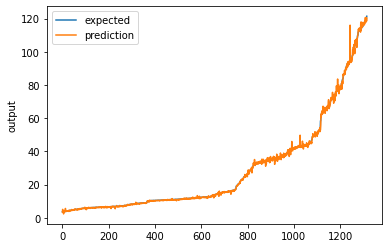

In [9]:
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)

